In [1]:
import numpy as np
from tqdm import tqdm
import networkx as nx
from bnn_package import evolution_vec, MSD, pos_nodes_uniform, connexion_normal_deterministic, connexion_normal_random_NUMBA, add_passive_nodes, evolve_system,step_fhn_rk4,coupling_func, fhn_derivatives

# Remove explicit backend selection to avoid conflicts
# import matplotlib
# matplotlib.use('macosx')

import matplotlib.pyplot as plt

print('Matplotlib backend:', plt.get_backend())


Matplotlib backend: module://matplotlib_inline.backend_inline


In [6]:
# ------------ Parameters ------------

#Seed
rng = np.random.default_rng(42)

# Graph parameters 
N_nodes = 100
std = 0.1
mean = 0.0
(xmax, ymax) = (1.0, 1.0)
f = 0.7 # mean of the poisson of passive nodes per active node

# Evolution parameters : FN 
A = 3.          #0
alpha = 0.2     #1
Eps = 0.08      #2
K = 0.25        #3
V_RP = 1.5      #4
dt = 0.1        #5
params_FN = [A, alpha, Eps,  K,  V_RP, dt]

# Simulation parameters
T_max = 11000
C_r = 0.1
D = 0.1
eps = 0

# Initial conditions
State_0 = np.zeros((N_nodes, 3))
State_0[:, 0] = 0.5 + 0.1 * np.random.randn(N_nodes)  # v_e
State_0[:, 1] = 0.3 + 0.1 * np.random.randn(N_nodes)  # g
State_0[:, 2] = 1.0 + 0.1 * np.random.randn(N_nodes)




(2, 100)
{0: (np.float64(0.7739560485559633), np.float64(0.908580690707607)), 1: (np.float64(0.4388784397520523), np.float64(0.6997071338107496)), 2: (np.float64(0.8585979199113825), np.float64(0.2658699614595196)), 3: (np.float64(0.6973680290593639), np.float64(0.9691763773477239)), 4: (np.float64(0.09417734788764953), np.float64(0.7787509039657946)), 5: (np.float64(0.9756223516367559), np.float64(0.7168901891589956)), 6: (np.float64(0.761139701990353), np.float64(0.44936150214378867)), 7: (np.float64(0.7860643052769538), np.float64(0.272241561845159)), 8: (np.float64(0.12811363267554587), np.float64(0.0963909621534993)), 9: (np.float64(0.45038593789556713), np.float64(0.9026023965438417)), 10: (np.float64(0.37079802423258124), np.float64(0.45577628983361107)), 11: (np.float64(0.9267649888486018), np.float64(0.20236336479523032)), 12: (np.float64(0.6438651200806645), np.float64(0.3059566241506525)), 13: (np.float64(0.82276161327083), np.float64(0.579219568941896)), 14: (np.float64(0.4

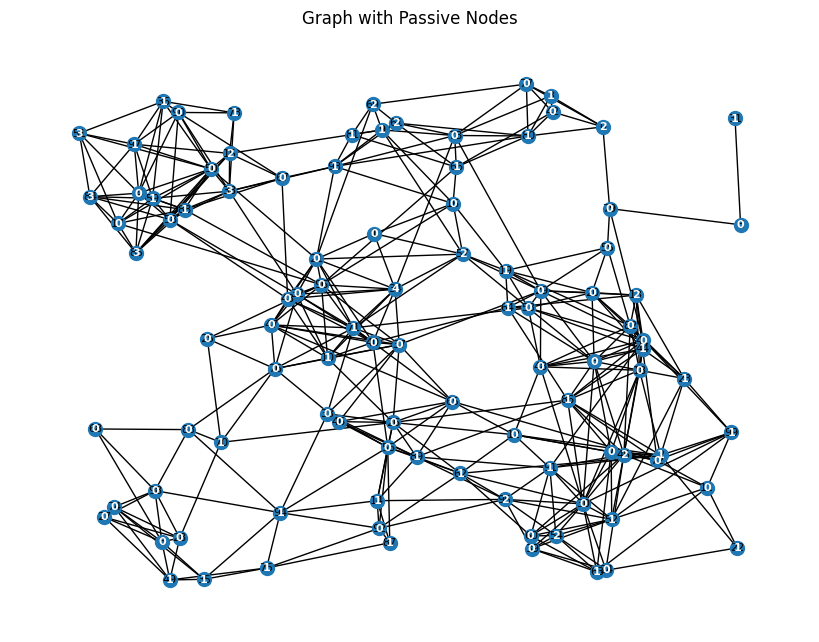

In [8]:
# ------------ Build Graph ------------

# Generate active nodes
rng = np.random.default_rng(42)
pos_nodes = pos_nodes_uniform(N_nodes, xmax, ymax, rng)
Adj = connexion_normal_deterministic(pos_nodes, rng, std)
G = nx.from_numpy_array(Adj)
print(pos_nodes.shape)

# Genererate passive nodes
Graph_passive, N_p = add_passive_nodes(G, f,rng)


# Creating pos dictionary for plotting
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = (pos_nodes[0, i], pos_nodes[1, i])
print(pos)


# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw(
    Graph_passive,
    pos,
    with_labels=True,
    node_size=100, 
    font_size=8)
labels = {node: str(Graph_passive.nodes[node]["passives"]) for node in G.nodes()}
nx.draw_networkx_labels(
    Graph_passive,
    pos,
    labels=labels,
    font_color='white',
    font_size=8,
    font_weight='bold'
)
plt.title("Graph with Passive Nodes")
plt.show()



In [9]:
# ------------ Evolution ------------
Adj = Adj.astype(np.float64)
Trajectory = evolve_system(State_0, T_max, params_FN, step_fhn_rk4, eps, N_p, Adj, C_r, D)

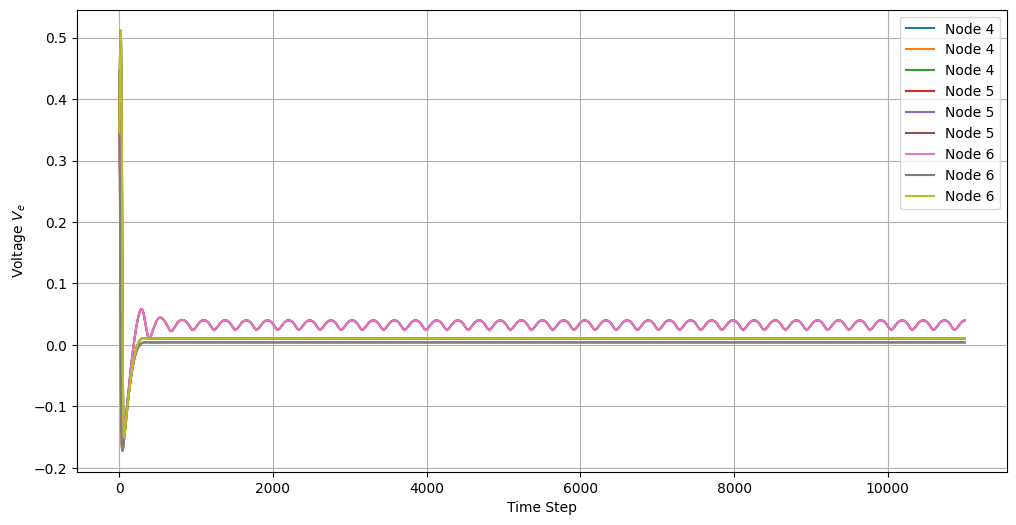

[[0.40243354 0.44482727 0.34561699]
 [0.39416766 0.4324656  0.35963321]
 [0.38535621 0.41903987 0.37328319]
 ...
 [0.03981415 0.00416183 0.01042721]
 [0.03984405 0.00416183 0.01042709]
 [0.03987166 0.00416183 0.01042696]]


In [14]:

plt.figure(figsize=(12, 6))
v_e = Trajectory[:, 4:7, 0]
plt.plot( np.arange(len(v_e[:,0])),v_e,label=f'Node {4}')
plt.plot( np.arange(len(v_e[:,1])),v_e,label=f'Node {5}')
plt.plot( np.arange(len(v_e[:,2])),v_e,label=f'Node {6}')

plt.xlabel('Time Step')
plt.ylabel('Voltage $V_e$')
plt.legend()
plt.grid(True)
plt.show()
print(v_e)
